[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 1 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from matplotlib import pylab
import numpy as np
from PySDM.physics import si, Formulae, constants as const, spectra
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Lowe_et_al_2019.aerosol import AerosolMarine, AerosolBoreal, AerosolNascent

In [3]:
from PySDM.physics.surface_tension import compressed_film_ovadnevaite
compressed_film_ovadnevaite.sgm_org = 40 * si.mN / si.m
compressed_film_ovadnevaite.delta_min = 0.1 * si.nm  # TODO #604 0.2 in the paper, but 0.1 matches the paper plots

In [4]:
cases = {
    'Marine (MA)': AerosolMarine(),
    'Boreal (HYY)': AerosolBoreal(),
    'NUM event (NE)': AerosolNascent()
}

formulae_bulk = Formulae(surface_tension='Constant')
formulae_surf = Formulae(surface_tension='CompressedFilmOvadnevaite')

r_wet = np.logspace(np.log(150 * si.nm), np.log(3000 * si.nm), base=np.e, num=100)
r_dry = 50 * si.nm
v_wet = formulae_surf.trivia.volume(r_wet)
v_dry = formulae_surf.trivia.volume(r_dry)
T=300 * si.K
r_wet_ticks_nm = (300, 500, 700, 1000, 3000)

### Fig. 1 a

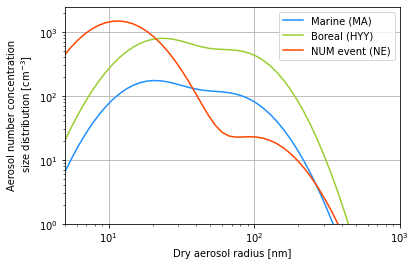

HTML(value="<a href='./tmp00nrw5p6.pdf' target='_blank'>./tmp00nrw5p6.pdf</a><br>")

In [5]:
x = np.logspace(np.log(5 * si.nm), np.log(1000 * si.nm), base=np.e)
for k, v in cases.items():
    spec = spectra.Sum(
        tuple(v.aerosol_modes_per_cc[i]['spectrum'] for i in range(len(v.aerosol_modes_per_cc)))
    )
    pylab.loglog(x / si.nm, spec.size_distribution(x)*x / si.cm**-3, label=k, color=v.color)
pylab.ylim(1, 2500)
pylab.xlim(5, 1000)
pylab.legend()
pylab.grid()
pylab.xlabel('Dry aerosol radius [nm]')
pylab.ylabel('Aerosol number concentration\n size distribution [cm$^{-3}$]')
show_plot()

### Fig. 1 c

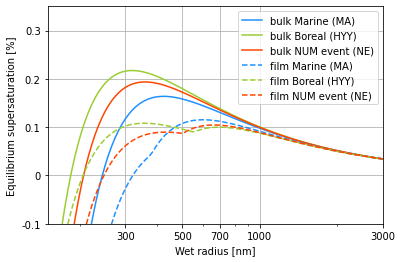

HTML(value="<a href='./tmp5dlvnw6c.pdf' target='_blank'>./tmp5dlvnw6c.pdf</a><br>")

In [6]:
rd3 = r_dry**3
        
for label, formulae in {'bulk': formulae_bulk, 'film': formulae_surf}.items():
    for k, v in cases.items():
        sigma = formulae.surface_tension.sigma(np.nan, v_wet, v_dry, v.aerosol_modes_per_cc[0]['f_org'])
        RH_eq = formulae.hygroscopicity.RH_eq(r_wet, T, v.aerosol_modes_per_cc[0]['kappa'][label], rd3, sigma)
        pylab.plot(
            r_wet / si.nm, 
            (RH_eq - 1)*100, 
            label=f"{label} {k}", 
            color=v.color,        
            linestyle='-' if label == 'bulk' else '--'
        )
pylab.grid()
pylab.xscale('log')
pylab.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
pylab.xlabel('Wet radius [nm]')
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pylab.ylabel('Equilibrium supersaturation [%]')
yticks = (-.1, 0, .1, .2, .3)
pylab.yticks(yticks, yticks)
pylab.ylim(yticks[0], .35)
pylab.legend()
show_plot()

### Fig. 1 d

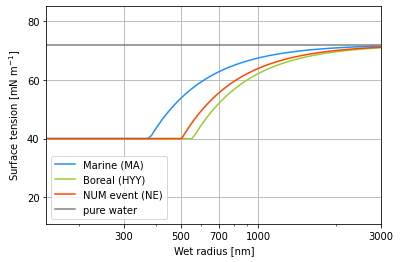

HTML(value="<a href='./tmphx14w0lf.pdf' target='_blank'>./tmphx14w0lf.pdf</a><br>")

In [7]:
for k, v in cases.items():
    sigma = formulae_surf.surface_tension.sigma(np.nan, v_wet, v_dry, v.aerosol_modes_per_cc[0]['f_org'])
    pylab.plot(r_wet / si.nm, sigma / (si.mN / si.m), label=k, color=v.color)
pylab.plot(r_wet / si.nm, np.full_like(r_wet, const.sgm_w / (si.mN / si.m)), label='pure water', color='gray')
pylab.grid()
pylab.xscale('log')
pylab.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
yticks = (20, 40, 60, 80)
pylab.yticks(yticks, yticks)
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pylab.ylim(11, 85)
pylab.xlabel('Wet radius [nm]')
pylab.ylabel('Surface tension [mN m$^{-1}$]')
pylab.legend()
show_plot()